<a href="https://colab.research.google.com/github/mini3713/mini3713/blob/main/machine%20learning%20%26%20deep%20learning/HG_07_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**7 딥러닝**
============================

7-1. 인공 신경망
==================
> 딥러닝과 인경신경망 알고리즘 이해 및 실습

> ### 패션 MNIST
> * 딥러닝 모델 구현을 위해 **텐서플로** TensorFlow 사용

In [2]:
# MNIST 데이터 다운로드
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# 데이터의 크기 확인
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [4]:
# 테스트세트 크기 확인
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


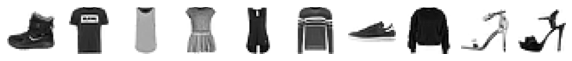

In [5]:
# 몇개의 데이터 출력
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [6]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [7]:
# 레이블 당 샘플 개수
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


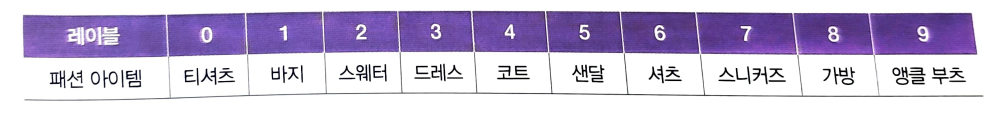

> ### 로지스틱 회귀로 패션 아이템 분류하기

In [8]:
# 각 픽셀의 값을 정규화 
train_scaled = train_input / 255.0
# 2차원 배열인 각 샘플을 1차원 배열로 펼치는 작업
train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)

(60000, 784)


In [9]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8195666666666668


In [10]:
# 반복횟수 9
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=9, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8303833333333334


In [11]:
# 반복횟수 20
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=20, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8436999999999999


$$ z(티셔츠) = w1 × (픽셀1) + w2 × (픽셀2) + ... + w784 × (픽셀784) + b$$  
  
$$ z(바지) = w'1 × (픽셀1) + w'2 × (픽셀2) + ... + w'784 × (픽셀784) + b'$$

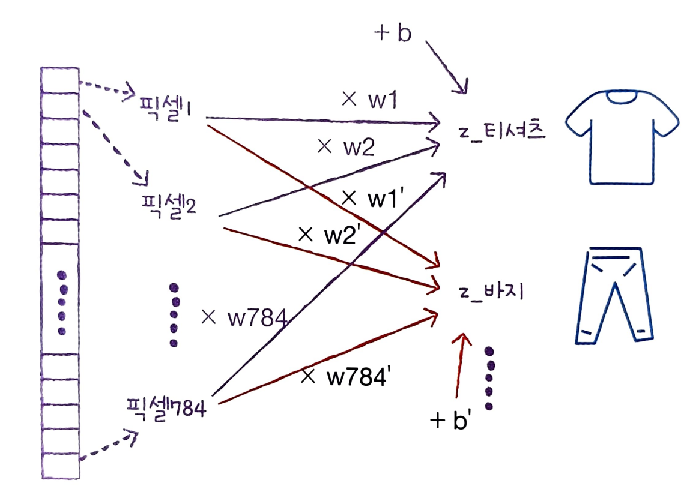

> ### 인공 신경망으로 모델 만들기
> * 로지스텍 회귀에서는 교차 검증을 사용해 모델을 평가했지만, 인공신경망에서는 교차 검증을 잘 사용하지 않고 검증 세트를 덜어내어 사용 
> * 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적
> * 교차 검증을 수행하기에는 훈련 시간이 너무 오래 걸린다 

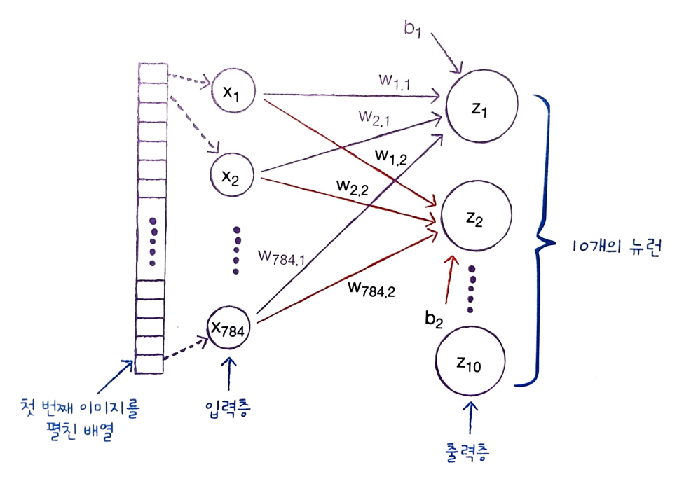

In [12]:
# 인공신경망을 위해 검증세트를 나눈다
# 20% 정도는 검증세트
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [13]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [14]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


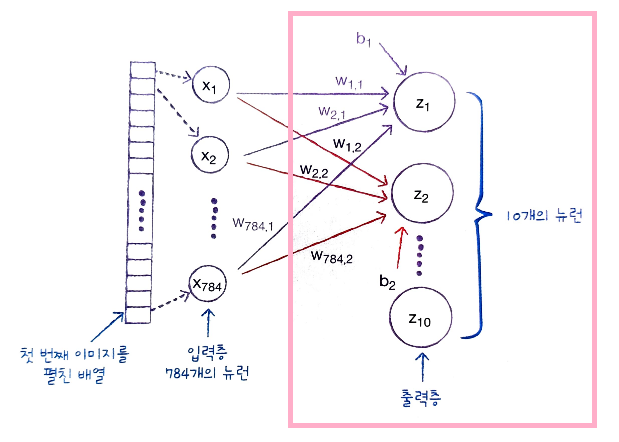

In [15]:
# 인공신경망의 밀집층 생성
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

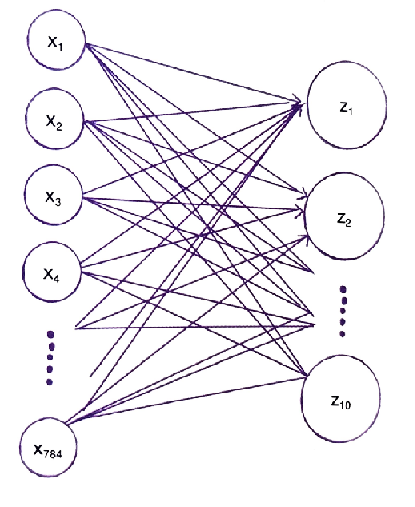

In [16]:
# 신경망 모델 생성, Sequential 클래스 활용
model = keras.Sequential(dense)

> * 소프트맥스와 같은 출력함수를 **활성화 함수** activation function 라고 부른다

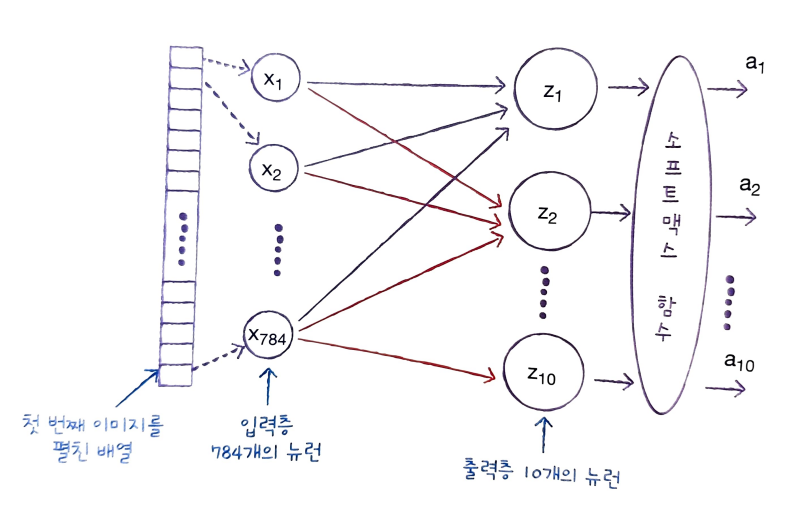

> ### 인공신경망으로 패션 아이템 분류하기

In [17]:
# 모델 훈련전에 손실함수 설정
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

> * 이진분류: loss = 'binary_crossentropy'
> * 다중분류: loss = 'categorical_crossentropy'

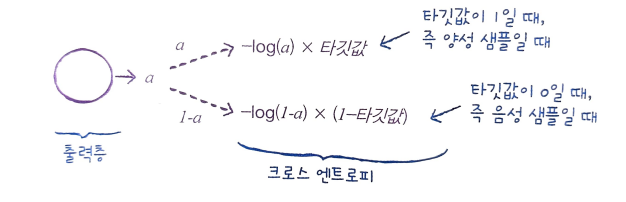

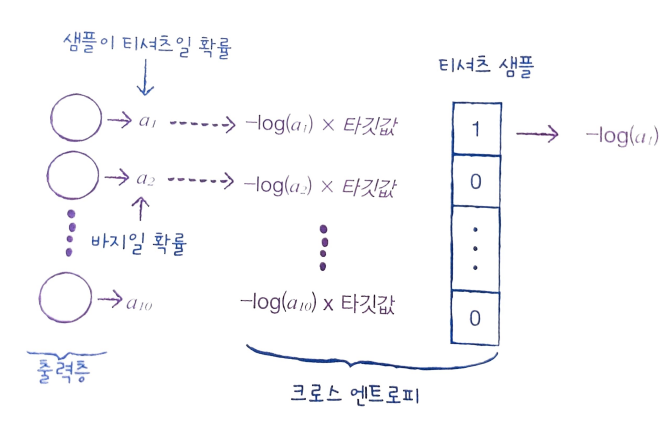

In [18]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [19]:
# 텐서플로에서는 원핫인코딩으로 바꾸지 않고 사용할 수 있다
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6092 - accuracy: 0.7930
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4786 - accuracy: 0.8386
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4559 - accuracy: 0.8480
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4448 - accuracy: 0.8515
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4362 - accuracy: 0.8555


In [20]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4485 - accuracy: 0.8495


[0.4484606385231018, 0.8495000004768372]

7-2. 심층 신경망
==================
> 인공 신경망에 여러층을 추가하여 심층 신경망 실습 

> ### 2개의 층

In [21]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets. fashion_mnist.load_data()

In [22]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

> * 은닉층의 활성화 함수는 출력층에 비해 자유롭다
> * 대표적으로 시그모이드 함수와 렐루함수 등을 사용한다

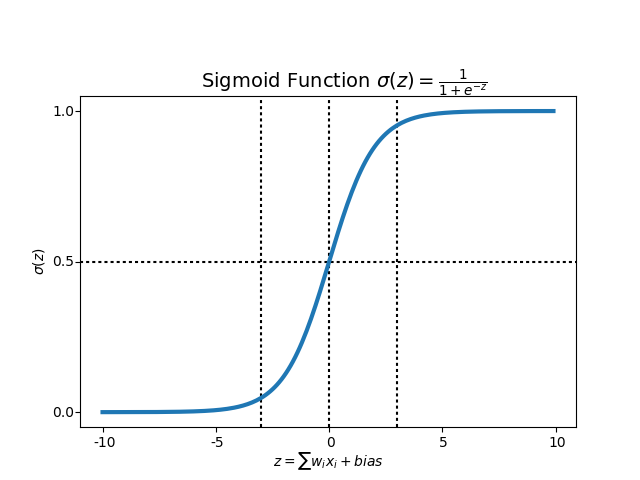

출처 : https://snowdeer.github.io/machine-learning/2018/01/04/activation-function/

In [23]:
# 은닉층, 입력의 크기는 784, 100개의 뉴런을 가짐
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
# 출력층, 은닉층의 뉴런개수는 출력층의 뉴런개수보다는 많아야함
dense2 = keras.layers.Dense(10, activation='softmax')

> ### 심층 신경망 만들기

In [24]:
# sequential 클래스에 은닉층과 출력층을 추가하여 심층 신경망 생성
# 주의할 것은 출력층을 가장 마지막에 두어야 함 
model = keras.Sequential([dense1, dense2])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


> * 입력층 784개의 뉴런이 은닉층을 통과하면서 100개의 특성으로 압축되었고, 각 조합에 대한 가중치가 있으므로 (784*100)+100 = 78500개의 파라미터
> * 은닉층 100개의 뉴런이 출력층을 통과하면서 10개의 특성으로 압축돼고, 각 조합에 대한 가중치가 있으므로 (100*10)+10 = 1010개의 파라미터

> ### 층을 추가하는 다른 방법

In [26]:
# Sequential 클래스 생성자 안에서 바로 Dense 클래스 객채 생성
model = keras.Sequential([keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'), keras.layers.Dense(10, activation='softmax', name='output')], name='패션 MNIST 모델')

In [27]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [28]:
# add() 매서드 활용
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [30]:
# 모델의 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5654 - accuracy: 0.8071
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4076 - accuracy: 0.8539
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3716 - accuracy: 0.8657
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3489 - accuracy: 0.8727
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3324 - accuracy: 0.8790


> ### 렐루 함수
> * 딥러닝의 오차 역전파 과정에서 시그모이드 함수를 편미분하여 적용하게 되는데, 이 과정에서 역전파 될 값의 절대값이 클수록 0에 수렴하면서 기울기가 소실되어 가중치의 업데이트가 일어나지 않게 됨 
> * 이를 개선하기 위해 제안된 활성화 함수가 바로 **렐루 함수**
> * 렐루함수는 양수는 그대로(기울기가 1) 음수는 0으로 반환하기 때문에, 특정 양수 값에 수렴하지 않음 


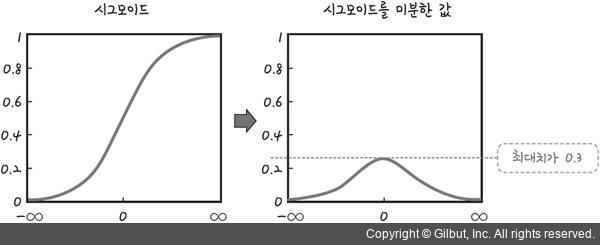  
출처 : http://cbjsena.blogspot.com/2018/12/blog-post_25.html

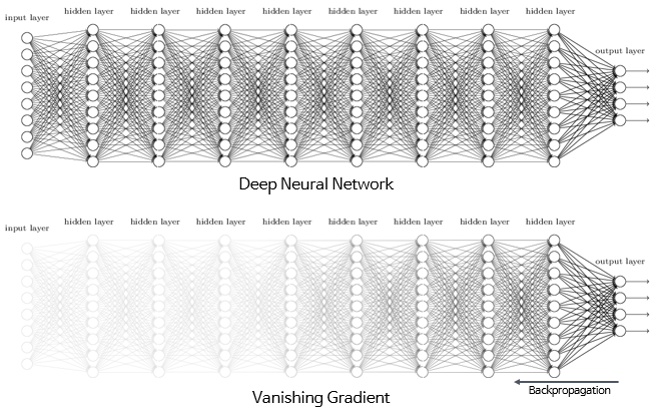

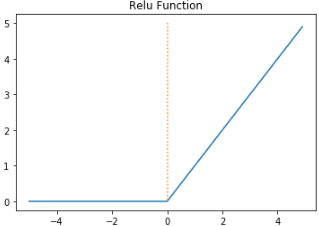  
출처 : https://wikidocs.net/60683

In [32]:
# flatten 클래스는 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할을 함 
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [33]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


> * 입력 데이터에 대한 전처리 과정(Flatten 클래스와 같은)을 가능한 모델에 포함시키는 것이 케라스 API의 철학

In [34]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [35]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5372 - accuracy: 0.8129
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3928 - accuracy: 0.8590
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3567 - accuracy: 0.8728
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3348 - accuracy: 0.8803
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3199 - accuracy: 0.8852


In [36]:
# 검증세트에서의 성능 확인
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3722 - accuracy: 0.8770


[0.37222781777381897, 0.8769999742507935]

> ### 옵티마이저 
> * 케라스에서 제공하는 다양한 종류의 경사 하강법 알고리즘을 **옵티마이저**라고 함
> * 가장 기본적인 옵티마이저는 확률적 경사 하강법인 **SGD** 

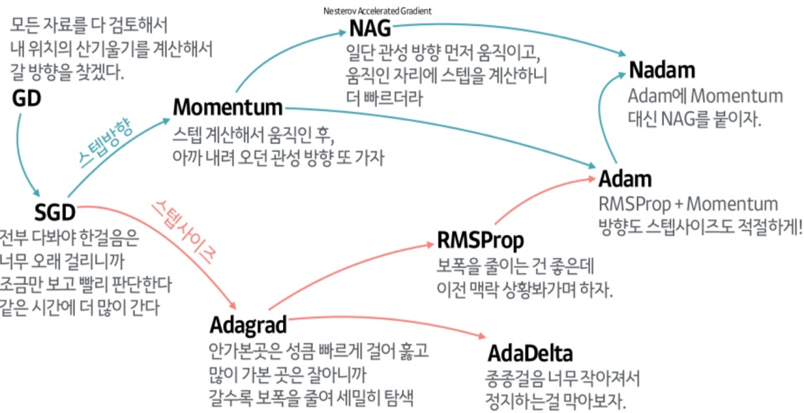  
출처 : 하용호(카카오)

In [37]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [38]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5263 - accuracy: 0.8157
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3966 - accuracy: 0.8590
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3540 - accuracy: 0.8724
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3295 - accuracy: 0.8795
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3110 - accuracy: 0.8861


In [39]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3526 - accuracy: 0.8739


[0.35264208912849426, 0.8739166855812073]

7-3. 신경망 모델 훈련
================== 

> ### 손실곡선

In [42]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [43]:
model = model_fn()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [45]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


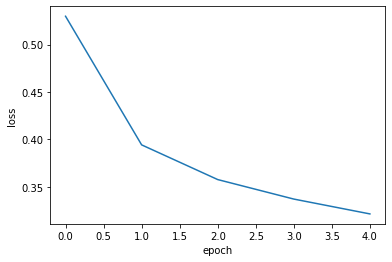

In [47]:
# 손실곡선 그래프
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

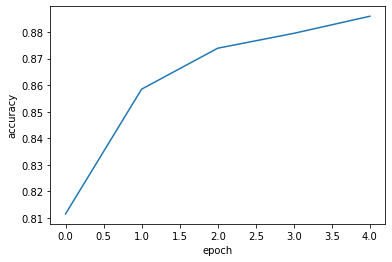

In [49]:
# 정확도 곡선 그래프
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

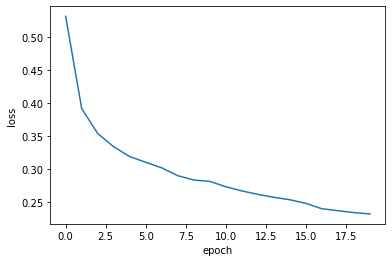

In [50]:
# 에포크 횟수 20으로 증가
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

> ### 검증 손실
> * 훈련세트의 손실에만 집중하다보면 훈련세트에 과대적합한 모델이 생성됨 

In [51]:
# 검증 손실을 validation_data 매개변수에 전달하여 그래프로 나타냄
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [53]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


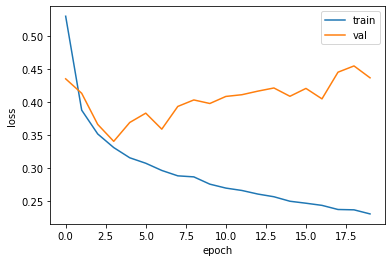

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

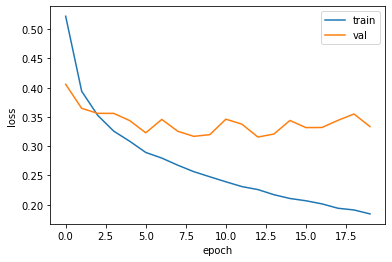

In [56]:
# 옵티마이저 하이퍼파라미터를 조정하여 과대적합을 완화
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

> ### 드롭아웃
> * 훈련 과정에서 층에 있는 일부 뉴런을 램덤하게 꺼서 과대적합을 막음
> * 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 함 
> * 또한 드롭아웃을 통해 여러개의 신경망을 양상블 하는 것처럼 사용할 수 있음 

In [57]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


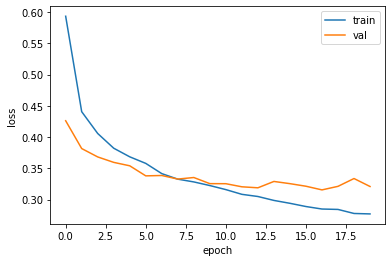

In [58]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

> ### 모델 저장과 복원
> * 에포크 20에서는 훈련세트에 다소 과대적합 
> * 따라서 에포크 10으로 다시 지정하고 모델을 훈련하고 저장

In [59]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

In [60]:
# 케라스 모델은 훈련된 모델의 파라미터를 저장하는 save_weights() 매서드 제공
model.save_weights('model-weights.h5')
# 모델 구조와 모델 파라미터를 함께 저장하는 save() 매서드도 제공
model.save('model-whole.h5')

In [61]:
!ls -al *.h5

-rw-r--r-- 1 root root 333448 Nov  8 01:30 model-weights.h5
-rw-r--r-- 1 root root 982664 Nov  8 01:30 model-whole.h5


> 1) 훈련을 하지 않은 새로운 모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용  
> 2) model-whole.h5 파일에서 새로운 모델을 만들어 바로 사용 

In [62]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [63]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 2s 3ms/step
0.8814166666666666


In [65]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3299 - accuracy: 0.8814


[0.329884797334671, 0.8814166784286499]

> ### 콜백
> * 앞선 모델은 20번의 에포크를 주고 검증 점수가 상승하는 지점을 확인하여, 모델이 과대적합 되지 않는 에포크만큼 다시 훈련함
> * 하지만 케라스의 콜백을 사용하면 모델을 두번씩 훈련하지 않고 한번에 끝낼 수 있음 

In [67]:
# keras.callbacks 패키지 활용
# ModelCheckpoint 콜백은 에포크마다 모델을 저장하므로 가장낮은 검증점수를 만드는 모델을 저장할 수 있음
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

In [70]:
model = keras.models.load_model('best_model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3206 - accuracy: 0.8867


[0.32059410214424133, 0.8867499828338623]

In [71]:
# 과대적합이 시작되기 전에 훈련을 미리 중지하는 조기종료 EarlyStopping 콜백을 제공
# patience 매개변수는 검증 점수가 향상되지 않더라도 계속 진행할 에포크 횟수를 지정
# restore_best_weights 매개변수는 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌려줌
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [72]:
print(early_stopping_cb.stopped_epoch)

12


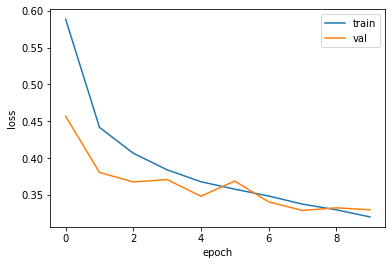

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [75]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.3203 - accuracy: 0.8840


[0.32029515504837036, 0.8840000033378601]